api example. the code below can be executed remotely.

In [1]:
from PIL import Image
from io import BytesIO
import numpy as np
import requests

pi_address = 'raspberrypi.local'
#pi_address = '10.61.100.177'

In [2]:
# get some info
r = requests.get(f'http://{pi_address}:8000/info')
print(r.json()['sensor_modes'])
print('\n')
print(r.json()['cam_info'])
print('\n')
info = r.json()['sensor_modes']

for iter, data in enumerate(info):
    print(f'mode {iter} is {data}')



[{'bit_depth': 10, 'crop_limits': [480, 460, 640, 480], 'exposure_limits': [16, 1115817, None], 'format': 'SGRBG10_CSI2P', 'fps': 120.0, 'size': [640, 480], 'unpacked': 'SGRBG10'}, {'bit_depth': 10, 'crop_limits': [0, 0, 1600, 1400], 'exposure_limits': [18, 1251050, None], 'format': 'SGRBG10_CSI2P', 'fps': 37.86, 'size': [1600, 1400], 'unpacked': 'SGRBG10'}, {'bit_depth': 12, 'crop_limits': [480, 460, 640, 480], 'exposure_limits': [16, 1115817, None], 'format': 'SGRBG12_CSI2P', 'fps': 120.0, 'size': [640, 480], 'unpacked': 'SGRBG12'}, {'bit_depth': 12, 'crop_limits': [0, 0, 1600, 1400], 'exposure_limits': [18, 1251050, None], 'format': 'SGRBG12_CSI2P', 'fps': 37.86, 'size': [1600, 1400], 'unpacked': 'SGRBG12'}, {'bit_depth': 8, 'crop_limits': [480, 460, 640, 480], 'exposure_limits': [16, 1115817, None], 'format': 'SGRBG8', 'fps': 120.0, 'size': [640, 480], 'unpacked': 'SGRBG8'}, {'bit_depth': 8, 'crop_limits': [0, 0, 1600, 1400], 'exposure_limits': [18, 1251050, None], 'format': 'SGRBG

1


In [110]:
# have a look at the current controls
r = requests.get(f'http://{pi_address}:8000/controls')
print(r.content)
controls = r.json()
for key,value in controls.items():
    print(f'{key} {value}')

b'{\n  "amount": 1,\n  "analog_gain": 1.0,\n  "exposure_us": 10000,\n  "illumination": true,\n  "mode": 0\n}\n'
amount 1
analog_gain 1.0
exposure_us 10000
illumination True
mode 0


In [148]:
# replace the current controls
controls['exposure_us']=300
r = requests.put(f'http://{pi_address}:8000/controls', json = controls)
print(r.content)

import time
frames = 100
t = time.time()
for i in range(frames):
    #r = requests.put(f'http://{pi_address}:8000/controls', json = controls)
    #r = requests.get(f'http://{pi_address}:8000/capturefast')
    message = {"reg": "0x100d"}
    r = requests.put(f'http://{pi_address}:8000/registers/read', json = message)
t2 = time.time()
print(r.content)

print(t2-t)
print(f'regs per second: {frames/(t2-t)}')

b'{"amount":1,"analog_gain":"1","apply":false,"cam_close":false,"cam_open":true,"download":false,"download_option":"tiff","exposure_us":300,"illumination":"off","mode":"0"}\n'
b'0\n'
8.945692300796509
regs per second: 11.17856468091309


In [ ]:
# replace single controls
controls['exposure_us']=3000
r = requests.put(f'http://{pi_address}:8000/controls/exposure_us', 'true')
print(r)

# replace single controls
controls['analog_gain']=1.1
r = requests.put(f'http://{pi_address}:8000/controls/', json = controls)
print(r)

# replace single controls
controls['analog_gain']=1.1
r = requests.put(f'http://{pi_address}:8000/controls/', json = controls)
print(r)
# r = requests.get(f'http://{pi_address}:8000/index')
# print(r.content)

In [72]:
# replace the current controls
controls['amount']=10
r = requests.put(f'http://{pi_address}:8000/controls', json = controls)
print(r.content)

b'<!doctype html>\n<html lang=en>\n<title>500 Internal Server Error</title>\n<h1>Internal Server Error</h1>\n<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>\n'


In [ ]:
for i in range(10):
    # CAPTURE IMAGE ARRAY
    r = requests.get(f'http://{pi_address}:8000/captureraw')
    print(r.content)
    
    # DOWNLOAD IMAGE ARRAY
    r = requests.get(f'http://{pi_address}:8000/uploads/imgraw0.tiff')
    print(r)
    i = Image.open(BytesIO(r.content))
    arr=np.asarray(i)
    print(arr)

In [10]:
import time
frames = 1
controls['amount']=10
r = requests.put(f'http://{pi_address}:8000/controls', json = controls)
print(r.content)
t = time.time()
for i in range(frames):
    r = requests.get(f'http://{pi_address}:8000/capturefast')
t2 = time.time()
print(t2-t)
print(f'fps: {frames/(t2-t)}')

NameError: name 'controls' is not defined

In [13]:
import time
from numpy.lib.npyio import NpzFile 
#change the mode
r = requests.put(f'http://{pi_address}:8000/controls/mode', '1')
print(r.json())

r = requests.get(f'http://{pi_address}:8000/capturefast')
print(r.json)

ret = NpzFile(BytesIO(r.content), own_fid=True, allow_pickle=True)  
print(ret.files)  
""" ['A'] """  
print(ret['A'].shape)  
""" (10,400,400) """  
print(ret['A'])

1
<bound method Response.json of <Response [200]>>
['A']
(1, 1400, 1600)
[[[463 487 464 ... 491 477 505]
  [201 475 196 ... 459 194 472]
  [469 490 465 ... 488 473 487]
  ...
  [170 452 182 ... 467 188 454]
  [440 465 446 ... 485 454 478]
  [180 442 177 ... 470 182 463]]]


In [67]:
ret['A']



array([[172, 160, 159, ...,  71,  75,  72],
       [164, 175, 179, ...,  71,  77,  74],
       [170, 171, 161, ...,  69,  69,  68],
       ...,
       [ 60,  64,  62, ...,  46,  50,  50],
       [ 59,  63,  64, ...,  46,  47,  50],
       [ 61,  61,  55, ...,  44,  47,  48]], dtype=uint16)

In [9]:
%matplotlib inline
import time

r = requests.get(f'http://{pi_address}:8000/testfast')
i = Image.open(BytesIO(r.content))

print(i)
arr=np.asarray(i)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7F4B5CE7F0>


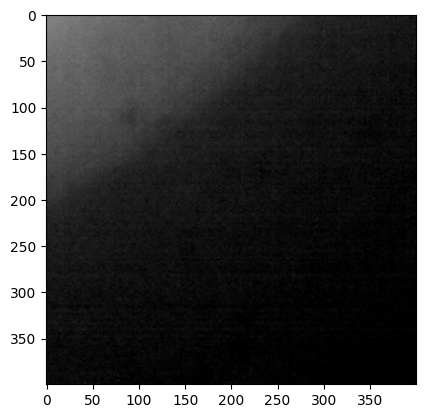

In [8]:
import matplotlib.pyplot as plt
plt.imshow(i)
plt.show()

In [161]:
#direct i2c access.
import subprocess
frames =100
t = time.time()
for i in range(frames):
    out = subprocess.check_output(r"i2cset -f -y 10 0x36 0x01 0xE5; i2cget -f -y 10 0x36", shell=True)
    t2 = time.time()

print("program output:", out)

print(t2-t)
print(f'regs per sec: {frames/(t2-t)}')



program output: b'0x13\n'
2.6846702098846436
regs per sec: 37.24852297753803


In [27]:
# READ REGISTER EXAMPLE
message = {"reg": "0x100d"}
r = requests.put(f'http://{pi_address}:8000/registers/read', json = message)
print(r.content)

# WRITE REGISTER EXAMPLE
message = {"reg": "0x100d", "val": "0x2"}
r = requests.put(f'http://{pi_address}:8000/registers/write', json = message)
print(r.content)

# ENABLE MANUAL MODE (disable reg upload and reset)
message = {"enable": "1"}
r = requests.put(f'http://{pi_address}:8000/registers/manual_mode', json = message)
print(r.content)

# DISABLE MANUAL MODE (disable reg upload and reset)
message = {"enable": "0"}
r = requests.put(f'http://{pi_address}:8000/registers/manual_mode', json = message)
print(r.content)

# ENABLE STREAM CONTROL (while in manual mode, still let picam2 write start/stop stream register)
message = {"enable": "1"}
r = requests.put(f'http://{pi_address}:8000/registers/stream_ctrl', json = message)
print(r.content)

# (default) DISABLE STREAM CONTROL (while in manual mode, user manually write start/stop stream register)
message = {"enable": "0"}
r = requests.put(f'http://{pi_address}:8000/registers/manual_mode', json = message)
print(r.content)

# DISABLE POWER EXAMPLE (reset pin)
message = {"enable": "0"}
r = requests.put(f'http://{pi_address}:8000/registers/power', json = message)
print(r.content)

# ENABLE POWER EXAMPLE
message = {"enable": "1"}
r = requests.put(f'http://{pi_address}:8000/registers/power', json = message)
print(r.content)

b'0\n'
b'2\n'
b'null\n'
b'null\n'
b'null\n'
b'null\n'
